In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [11]:
plot_x = np.linspace(-1., 6., 141)
plot_x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,

In [12]:
x = symbols('x')
f_x = (3*sin(x) - 2.5)**2 - 1 # 目标函数

def computer_value(func, x_socre):
    """计算函数func在x_score上的取值"""
    output = np.zeros_like(x_socre)
    for i in range(len(x_socre)):
        output[i] = func.subs({x:x_socre[i]})
    
    return output
    
plot_y = computer_value(f_x, plot_x)
plot_y

array([24.24472554, 23.40603562, 22.52231307, 21.5990063 , 20.64173921,
       19.65626399, 18.64841317, 17.62405136, 16.58902721, 15.54912589,
       14.5100227 , 13.47723815, 12.45609494, 11.45167727, 10.46879283,
        9.51193786,  8.58526549,  7.69255779,  6.83720165,  6.0221688 ,
        5.25      ,  4.52279372,  3.84219915,  3.20941381,  2.62518557,
        2.08981908,  1.60318663,  1.16474305,  0.77354467,  0.42827213,
        0.12725654, -0.13149098, -0.350247  , -0.53154081, -0.67811745,
       -0.79289881, -0.87894351, -0.93940585, -0.97749422, -0.99642952,
       -0.99940401, -0.98954091, -0.96985537, -0.94321701, -0.91231457,
       -0.87962302, -0.84737339, -0.81752573, -0.79174542, -0.77138312,
       -0.75745856, -0.75064829, -0.75127755, -0.75931646, -0.77438029,
       -0.79573411, -0.82230159, -0.8526779 , -0.88514661, -0.91770036,
       -0.94806511, -0.97372777, -0.9919668 , -0.99988559, -0.99444814,
       -0.97251686, -0.93089181, -0.86635131, -0.77569313, -0.65

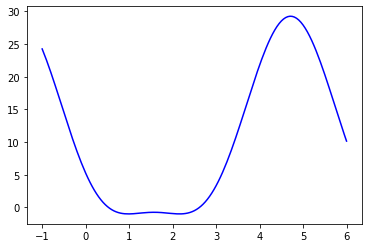

In [13]:
plt.plot(plot_x, plot_y, color='b') # 绘制目标函数
plt.show()

In [14]:
def gradient_descent(func, initial_value, lr, epsilon=1e-8, n_iters = 1e5):
    """
    计算函数func梯度下降过程中所有的迭代值
    :param initial_value: 初始值
    :param lr: 学习率(没有对学习率进行一维搜索)
    :param epsilon: 迭代结束时必须满足的精度
    :param n_iters: 迭代的最高轮数
    :return: 所有迭代值所组成的数组
    """
    value_history = []
    value = initial_value
    value_history.append(value)
    i_iter = 0
    while i_iter < n_iters:
        gradient = float(diff(func, x).subs({x:value}))
        last_value = value
        value = value - lr * gradient # 迭代值更新过程(导数方向是函数值下降最快的方向,由泰勒展开可的)
        value_history.append(value)
    
        if abs(float(func.subs({x:value})) - 
               float(func.subs({x:last_value}))) < epsilon: # 比较2次迭代值的差异,达到精度要求时跳出循环
            break
        
        i_iter += 1
    
    return value_history
            
            
def plot_value_history(value_history):
    plt.plot(plot_x, plot_y)
    plt.plot(np.array(value_history), computer_value(f_x, value_history),
           color="r", marker='+') # 绘制所有迭代值的运行轨迹
    plt.show()

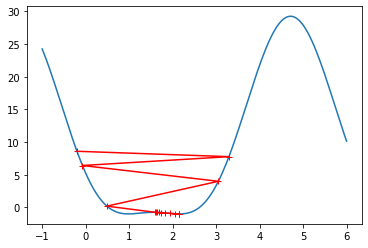

In [21]:
lr = 0.192
value_history = gradient_descent(f_x, -0.2, lr)
plot_value_history(value_history)